In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

import itertools 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve
from sklearn.grid_search import GridSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline


%matplotlib inline

In [2]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
names = """Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,
Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,
Color intensity,Hue,OD280/OD315 of diluted wines,Proline""".replace("\n", "").split(",")

In [4]:
wine.columns = names
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Train X dimension: %s, Test X dimension: %s" % (X_train.shape, X_test.shape))

Train X dimension: (124, 13), Test X dimension: (54, 13)


In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
pipeline = Pipeline(
    [("scl", StandardScaler()),
     ("pca", PCA(n_components = 2)),
     ("clf", LogisticRegression(random_state = 0, penalty = "l2"))])

In [94]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [95]:
pipeline.score(X_test, y_test)

0.98148148148148151

# K Cross Validation

In [96]:
kfold = StratifiedKFold(y = y_train, n_folds = 10, random_state = 0)

In [97]:
scores = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# n_jobs = -1: use all CPU cores for parallel computing

print("CV accuracy scores: ", scores)

CV accuracy scores:  [ 0.92307692  0.92307692  0.92307692  1.          1.          1.
  0.91666667  1.          1.          1.        ]


In [98]:
print("Mean CV accuracy: %.3f, std: %.3f" % (np.mean(scores), np.std(scores)))

Mean CV accuracy: 0.969, std: 0.039


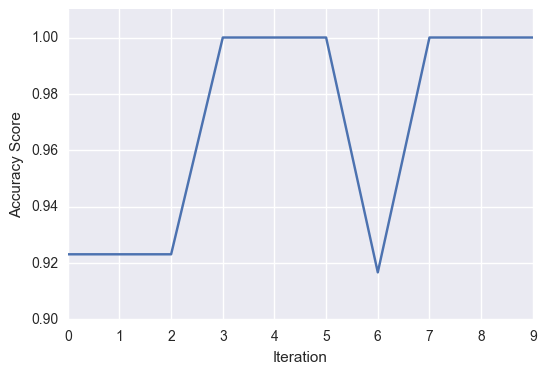

In [99]:
plt.plot(scores)
plt.ylim(0.9, 1.01)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")

In [100]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X = X_train, y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        cv = 10, 
                                                        n_jobs = -1)

# learning_curve internally uses stratified_kfold

In [101]:
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

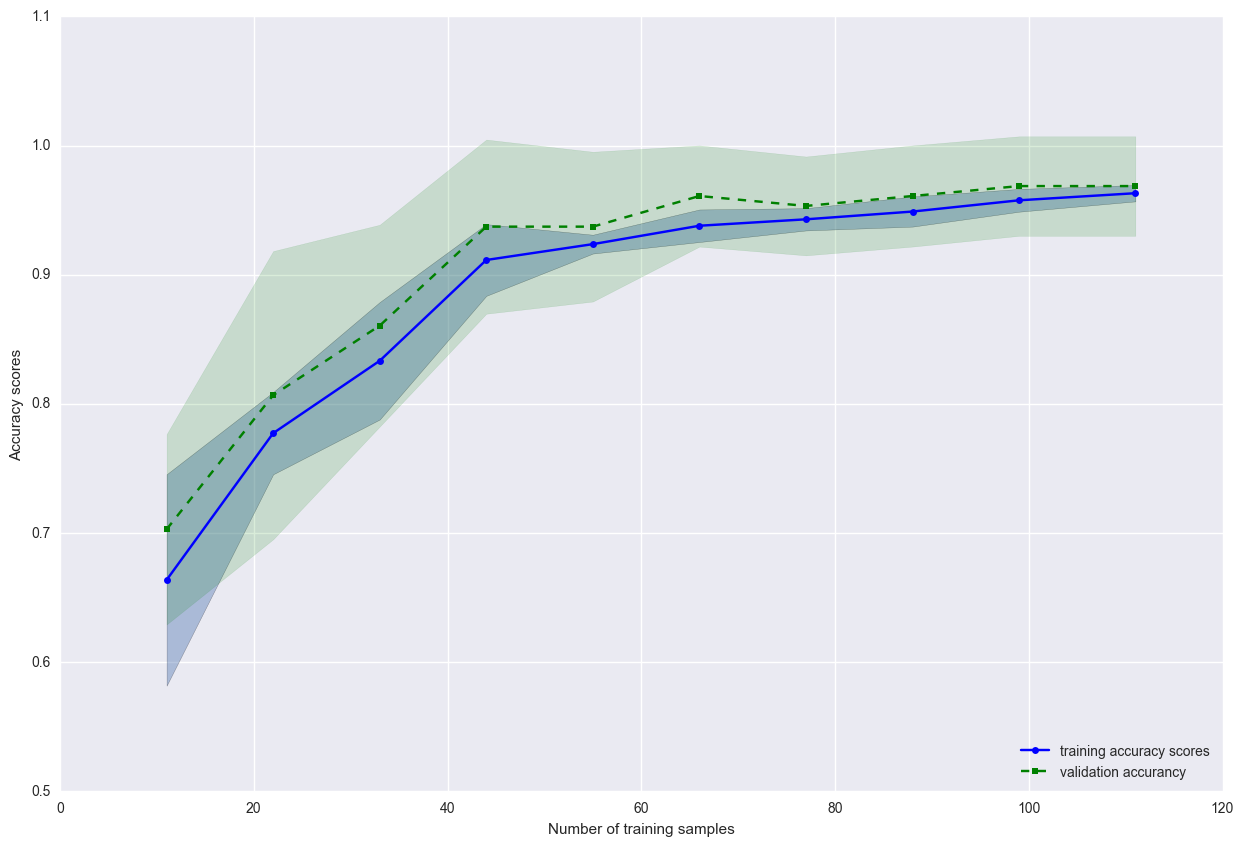

In [105]:
plt.figure(figsize = (15, 10))
plt.plot(train_sizes, train_mean, color = "b", marker = "o", markersize = 5, label = "training accuracy scores")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.4)
plt.plot(train_sizes, test_mean, color = "g", ls = "--", marker = "s", markersize = 5, label = "validation accurancy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "g")


plt.legend(loc = "lower right")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy scores")

# Validation Curve

In [130]:
np.set_printoptions(precision = 4, suppress= True)
param_range = 10.0 ** np.arange(-3, 4)
print("param_range", param_range)

param_range [    0.001     0.01      0.1       1.       10.      100.     1000.   ]


In [127]:
train_scores, test_scores = validation_curve(estimator = pipeline, 
                                             X = X_train, 
                                             y = y_train, 
                                             param_name = "clf__C", 
                                             param_range = param_range,
                                             cv = 10)

# validation_curve internally uses stratified_kfold

(0.8, 1.02)

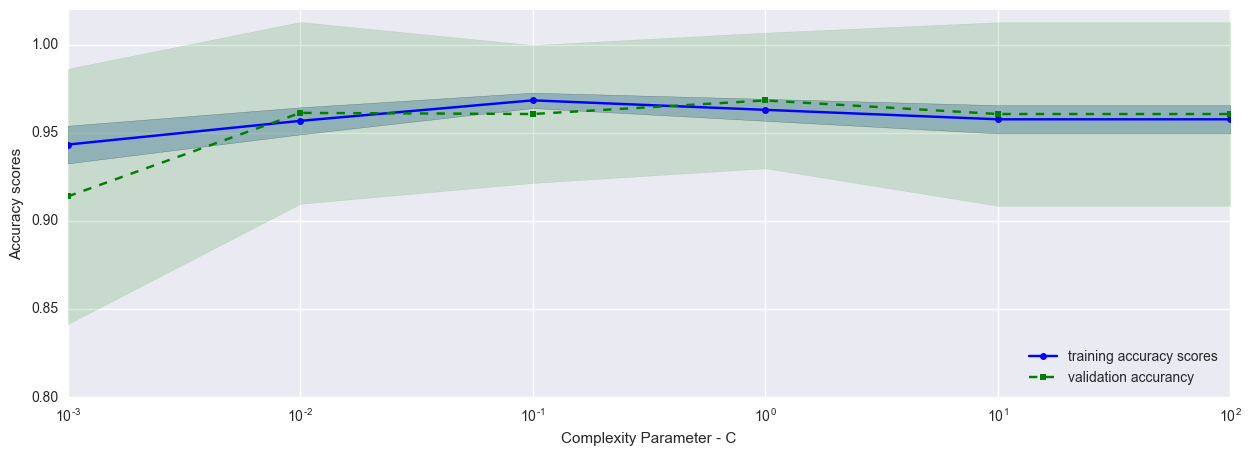

In [126]:
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (15, 5))
plt.plot(param_range, train_mean, color = "b", marker = "o", markersize = 5, label = "training accuracy scores")
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.4)
plt.plot(param_range, test_mean, color = "g", ls = "--", marker = "s", markersize = 5, label = "validation accurancy")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "g")


plt.legend(loc = "lower right")
plt.xlabel("Complexity Parameter - C")
plt.ylabel("Accuracy scores")
plt.xscale("log")
plt.ylim(0.8, 1.02)

# Hyper Parameter Tuning using Grid Search

In [168]:
pipe_svc = Pipeline([
        ("scl", StandardScaler()),
        ("clf", SVC(random_state = 0))
    ])


In [169]:
param_range = 10.0 ** np.arange(-4, 4)
param_range

array([    0.0001,     0.001 ,     0.01  ,     0.1   ,     1.    ,
          10.    ,   100.    ,  1000.    ])

In [170]:
param_grid = [
    {"clf__C": param_range, "clf__kernel": ["linear"]},
    {"clf__C": param_range, "clf__gamma": param_range, "clf__kernel": ["rbf"]}
]

In [171]:
gs = GridSearchCV(estimator = pipe_svc, 
                 param_grid = param_grid,
                 scoring = "accuracy",
                 cv = 10, 
                 n_jobs = -1)

In [172]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'clf__C': array([    0.0001,     0.001 ,     0.01  ,     0.1   ,     1.    ,
          10.    ,   100.    ,  1000.    ]), 'clf__kernel': ['linear']}, {'clf__C': array([    0.0001,     0.001 ,     0.01  ,     0.1   ,     1.    ,
          10.    ,   100.    ,  1000.    ]), 'clf__kernel': ['rbf'], 'clf__gamma': array([    0.0001,     0.001 ,     0.01  ,     0.1   ,     1.    ,
          10.    ,   100.    ,  1000.    ])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [173]:
print("Best params: %s Best score: %.4f" % (gs.best_params_, gs.best_score_))

Best params: {'clf__C': 0.01, 'clf__kernel': 'linear'} Best score: 0.9839


In [174]:
# Applying Grid Search on Decision Tree
tree = DecisionTreeClassifier(random_state = 0)
param_grid = [
    {"max_depth": [1, 2, 3, 4, 5, 6, 7, None]}
]

gs_tree = GridSearchCV(estimator = tree, param_grid = param_grid, scoring = "accuracy", cv = 5)
gs_tree.fit(X_train, y_train)
print("Best param: %s, best score: %s" % (gs_tree.best_params_, gs_tree.best_score_))

Best param: {'max_depth': 3}, best score: 0.8790322580645161
